<a href="https://colab.research.google.com/github/ikitova/MLatImperial2022/blob/master/lab01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metric methods: KNN

In [ ]:
!wget https://raw.githubusercontent.com/ikitova/MLatImperial2022/main/utility.py

--2022-01-23 16:43:22--  https://raw.githubusercontent.com/ikitova/MLatImperial2022/main/utility.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9389 (9.2K) [text/plain]
Saving to: ‘utility.py.1’

utility.py.1        100%[===================>]   9.17K  --.-KB/s    in 0s      

2022-01-23 16:43:22 (57.5 MB/s) - ‘utility.py.1’ saved [9389/9389]



In [ ]:
import sklearn as skl
import pandas as pd
import numpy as np
from sklearn.neighbors  import KNeighborsClassifier
import numpy as np
from  utility import plot_predictions_2D
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as colors
random_state=0

###  How does KNN work on toy oval noisy classes ?

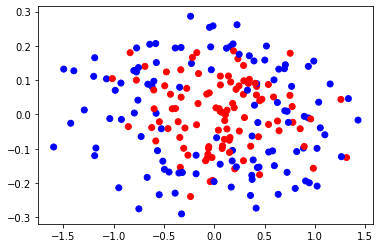

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
random_state=42
num_samples = 300
X, y = datasets.make_circles(n_samples=num_samples, factor=0.5, noise=.3,random_state=random_state)

X[:,1]=X[:,1]/5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='bwr')

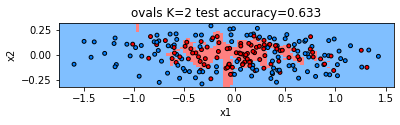

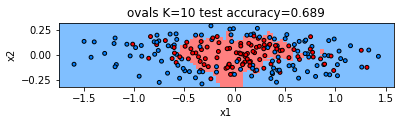

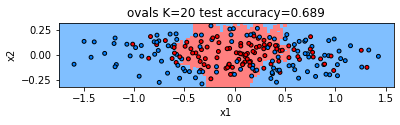

In [ ]:
for n in [2,10,20]:
    knn_model=KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    Y_predicted = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_predicted,y_test)
    
    plot_predictions_2D(
        knn_model, X_train, y_train,train=False, task='classification', n=100, cmap=colors.ocean, feature_names=['x1','x2'],alpha=0.5)
    plt.title('ovals K=%d test accuracy=%.3f'%(n,accuracy))   

### Featues scaling


To scale features, we will use the transformer [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Transformers in `sklearn` have methods `fit` and `transform` (and also `fit_transform`). The `fit` method takes a training sample as input and calculates the necessary values ​​from it (for example, statistics like `StandardScaler`: the mean and standard deviation of each feature). `transform` applies a transformation to the given dataset.

The most common scalers:
- **StandardScaler()**
- **MinMaxScaler()**

other scalers see in sklearn.preprocessing



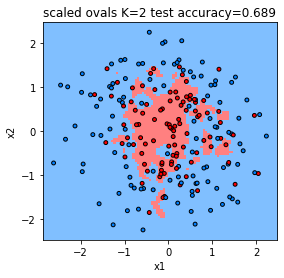

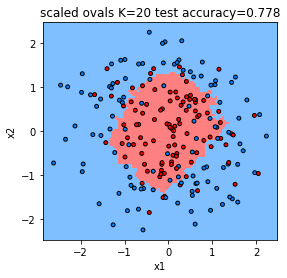

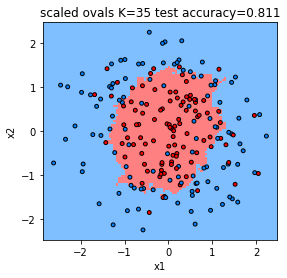

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
for n in [2,20,35]:
    knn_model=KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train_norm,y_train)
    Y_predicted = knn_model.predict(X_test_norm)
    accuracy = accuracy_score(Y_predicted,y_test)
    plot_predictions_2D(
        knn_model, X_train_norm, y_train, task='classification', n=100, cmap=colors.ocean, feature_names=['x1','x2'],alpha=0.5)
    plt.title('scaled ovals K=%d test accuracy=%.3f'%(n,accuracy))

 Feature scaling improved accuracy


In [ ]:
#<YOUR TURN>
# change scaler in previous cell to another  (MinMaxScaler, RobustScaler or other)
# does it give improvement in accuracy_score?

In [ ]:
#<YOUR TURN>
#try to find best combination of p and n_neighbors using these graphs

## Parameteres search

0| 1| 2| 3| 4| 5| 6| 7| 8| 9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24| 25| 26| 27| 28| 29| 30| 31| 32| 33| 34| 35| 36| 37| 38| 39| 40| 41| 42| 43| 44| 45| 46| 47| 48| 49| 51| 52| 53| 54| 55| 56| 57| 58| 59| 60| 61| 62| 63| 64| 65| 66| 67| 68| 69| 70| 71| 72| 73| 74| 75| 76| 77| 78| 79| 80| 81| 82| 83| 84| 85| 86| 87| 88| 89| 90| 91| 92| 93| 94| 95| 96| 97| 98| 99| 100.0| 
Min error_rate = 0.1667 for n_neighbors=53


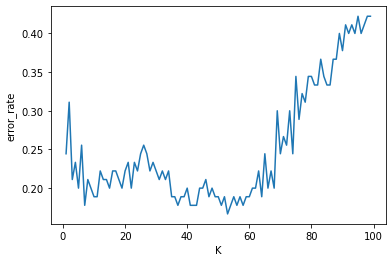

In [ ]:
from utility import show_param_dependency
knn = KNeighborsClassifier(p=2)
show_param_dependency(knn, X_train_norm, y_train, X_test_norm, y_test, param_name='n_neighbors', 
     
                      loss_fun='error_rate', param_vals=np.arange(1,100,1), x_label='K')

0| 11| 22| 33| 44| 56| 67| 78| 89| 100.0| 
Min error_rate = 0.1889 for p=2


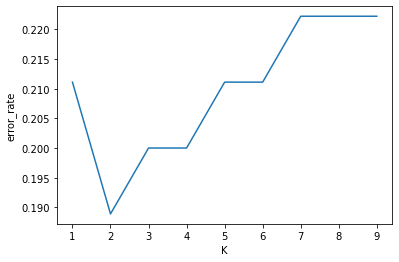

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35)
show_param_dependency(knn, X_train_norm, y_train, X_test_norm, y_test, param_name='p', 
     
                      loss_fun='error_rate', param_vals=np.arange(1,10,1), x_label='K')

In [ ]:
#QUESTION
#is it the best combination of p and n_neighbors?

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35,p=2)
knn.fit(X_train_norm,y_train)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=61)
X_train2_norm = scaler.fit_transform(X_train2)
X_test2_norm=scaler.transform(X_test2)
Y_predicted = knn.predict(X_test2_norm)
accuracy = accuracy_score(Y_predicted,y_test2)
print(accuracy)

0.7777777777777778


### Cross validation score

<img src="https://docs.splunk.com/images/thumb/e/ee/Kfold_cv_diagram.png/1200px-Kfold_cv_diagram.png" width=50%>


In cross-validation, we divide the training set into $n$ parts (folds). Then we train $n$ models: each model is trained in the absence of a corresponding fold, that is, the $i$-th model is trained on the entire training set, except for objects that are in the $i$-th fold (out-of-fold). After that we measure the quality of the $i$th model on the $i$th fold. Since it did not participate in the training of this model, we will get an "honest result". After that, to get the final value of the accuracy (or other) metric, we can average the $n$ values we got.


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
from sklearn.model_selection import cross_val_score
knn_classifier = KNeighborsClassifier(n_neighbors=35,p=2)
cv_scores = cross_val_score(knn_classifier, X_train_norm, y_train, cv=5, scoring="accuracy")
print("Cross-validation scores : ", cv_scores)
print(f"Cross-validation scores mean:",cv_scores.mean())
    

Cross-validation scores :  [0.73809524 0.5952381  0.5952381  0.69047619 0.73809524]
Cross-validation scores mean: 0.6714285714285715


In [ ]:
from sklearn.model_selection import cross_val_score
#listcv=[]
for i in [1,3,8,15,20,35]:
    knn_classifier = KNeighborsClassifier(n_neighbors=i,p=2)
    cv_scores = cross_val_score(knn_classifier, X_train_norm, y_train, cv=5, scoring="accuracy")
    print("Cross-validation scores : ", cv_scores)
    print(f"Cross-validation scores for K={i} :{cv_scores.mean():.3f} ")


Cross-validation scores :  [0.57142857 0.57142857 0.52380952 0.61904762 0.71428571]
Cross-validation scores for K=1 :0.600 
Cross-validation scores :  [0.64285714 0.64285714 0.64285714 0.73809524 0.73809524]
Cross-validation scores for K=3 :0.681 
Cross-validation scores :  [0.78571429 0.73809524 0.78571429 0.69047619 0.71428571]
Cross-validation scores for K=8 :0.743 
Cross-validation scores :  [0.76190476 0.76190476 0.66666667 0.71428571 0.71428571]
Cross-validation scores for K=15 :0.724 
Cross-validation scores :  [0.78571429 0.71428571 0.69047619 0.69047619 0.71428571]
Cross-validation scores for K=20 :0.719 
Cross-validation scores :  [0.73809524 0.5952381  0.5952381  0.69047619 0.73809524]
Cross-validation scores for K=35 :0.671 


##  GridSearchCV
<img src="https://quantmetry.b-cdn.net/wp-content/uploads/2019/11/corpsTME1.png" width="100%" />

*class sklearn.model_selection.GridSearchCV(estimator, param_grid, , scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Grid Search:
In Grid Search, the possible values of hyperparameters are defined into the set. Then these sets of possible values of hyperparameters are combined by using Cartesian product and form a multidimensional grid. 

The grid search then examines all combinations of these hyperparameters

For each possible combination of hyperparameters, we train a model on them

The hyperparameters associated with the highest accuracy are then returned

A grid search is guaranteed to examine all possible combinations of hyperparameters. The problem is that the more hyperparameters you have, the more the number of combinations grows exponentially.
If the hyperparameter search space is large, it takes a lot of time and computational power to optimize the hyperparameter.
There is no guarantee that these algorithms find local maximum.

Grid Search is an exhaustive search method

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_classifier = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,3,5,8,10,16,15,20,35,40], 'p':[1,2,3,4,6]}
grid_knn = GridSearchCV(knn, param_grid, n_jobs=-1, refit=True)
grid_knn.fit(X_train_norm,y_train)
print(grid_knn.best_score_, grid_knn.best_params_)


0.7428571428571429 {'n_neighbors': 8, 'p': 2}


In [ ]:
print("Test accuracy:", accuracy_score(y_test, grid_knn.best_estimator_.predict(X_test_norm)))

Test accuracy: 0.7888888888888889


Look at default parametrs of kNN.

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Iris species task

https://en.wikipedia.org/wiki/Iris_flower_data_set

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

### Spliting dataset into training set and test set

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

### 3D visualization

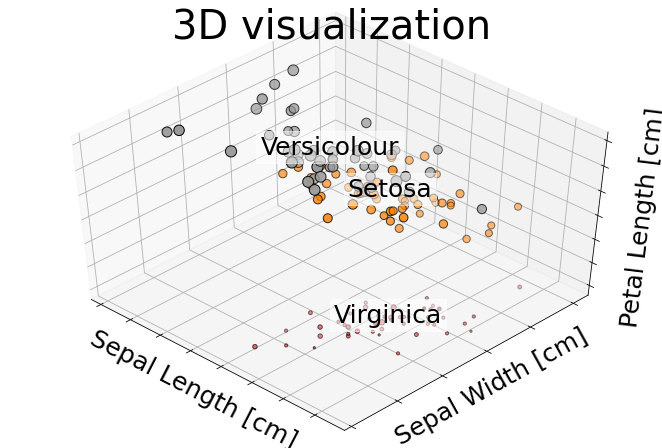

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(9, 6))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,3,5,8,10,15,20], 'p':[1,2,4,6]}
grid_knn = GridSearchCV(knn, param_grid, n_jobs=-1, refit=True)
grid_knn.fit(X_train,y_train)
print(grid_knn.best_score_, grid_knn.best_params_)

y_predicted = grid_knn.predict(X_test)
accuracy = accuracy_score(y_test,y_predicted)
print("accuracy=%.3f" %accuracy)

0.9731225296442687 {'n_neighbors': 10, 'p': 1}
accuracy=0.974


## Pipeline

Now we will use a very convenient class [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): model training is often represented as a sequence of some actions with training and test sets ( for example, first you need to scale the sample (and for the training sample you need to apply the `fit` method, and for the test sample &mdash; `transform`), and then train / apply the model (for the training `fit`, and for the test &mdash; `predict`) `Pipeline` allows you to store this sequence of steps and correctly handles different types of samples: both training and test.

 [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html):

 sklearn.pipeline.**Pipeline**(steps, *, memory=None, verbose=False)
 
 sklearn.pipeline.**make_pipeline**(*steps, memory=None, verbose=False)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

 # define the pipeline object.
pipeline = Pipeline(steps = [
              ('scaler', MinMaxScaler())
 
              ,('KNN',KNeighborsClassifier())
           ])

parameteres = {'KNN__n_neighbors':[1,2,5,10], 'KNN__p':[1,2,5]}
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(X_train, y_train)

print(grid.score(X_test,y_test))
print(grid.best_params_)


0.9736842105263158
{'KNN__n_neighbors': 1, 'KNN__p': 5}
